In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px
import ast

In [ ]:
steam_df = pd.read_csv("games.csv")
steam_df.head(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
steam_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97410 entries, 0 to 97409
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       97410 non-null  int64  
 1   Name                        97404 non-null  object 
 2   Release date                97410 non-null  object 
 3   Estimated owners            97410 non-null  object 
 4   Peak CCU                    97410 non-null  int64  
 5   Required age                97410 non-null  int64  
 6   Price                       97410 non-null  float64
 7   Discount                    97410 non-null  int64  
 8   DLC count                   97410 non-null  int64  
 9   About the game              92540 non-null  object 
 10  Supported languages         97410 non-null  object 
 11  Full audio languages        97410 non-null  object 
 12  Reviews                     10125 non-null  object 
 13  Header image                974

In [ ]:
features= steam_df.columns
features

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [ ]:
steam_df = steam_df.drop(['AppID','Header image'], axis=1)

In [ ]:
steam_df.isna().sum()

Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
Discount                          0
DLC count                         0
About the game                 4870
Supported languages               0
Full audio languages              0
Reviews                       87285
Website                       54673
Support url                   51510
Support email                 16035
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                93457
User score                        0
Positive                          0
Negative                          0
Score rank                    97366
Achievements                      0
Recommendations                   0
Notes                         81937
Average playtime forever    

In [ ]:
missing_name = steam_df.loc[steam_df['Name'].isna()].index
steam_df = steam_df.drop(missing_name)

In [ ]:

steam_df['Release date'] = pd.to_datetime(steam_df['Release date'], errors='coerce', format='mixed')

In [ ]:
steam_df = steam_df.drop(steam_df[steam_df['Release date'] > '2024-09-30'].index)

In [ ]:
len(steam_df["Estimated owners"].unique())


14

In [ ]:
def get_avg(x):
    x = x.strip()
    x= x.split("-")
    x = [num.strip(' ') for num in x]
    num1 = int(x[0])
    num2 = int(x[1])
    avg = (num2 - num1)/2
    return avg

for index, row in steam_df.iterrows(): 
     steam_df.at[index, 'EOM'] = get_avg(steam_df.at[index, 'Estimated owners'])

In [ ]:
last_update = datetime(2024, 9, 30)

steam_df['days_since_release'] = (last_update - steam_df['Release date']).dt.days

steam_df['DEOM'] = steam_df.apply(
    lambda row: row['EOM'] / np.log(row['days_since_release']) if row['days_since_release'] > 0 else 0,
    axis=1
)


In [ ]:
steam_df["DEOM"].describe(percentiles= [0.01, 0.05, 0.1, 0.15, 0.25, 0.4 , 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

count    9.740100e+04
mean     4.334792e+03
std      4.926373e+04
min      0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
10%      0.000000e+00
15%      0.000000e+00
25%      1.275140e+03
40%      1.345445e+03
50%      1.405366e+03
75%      1.803369e+03
85%      2.131050e+03
90%      3.114177e+03
95%      6.766865e+03
99%      5.767298e+04
max      6.688660e+06
Name: DEOM, dtype: float64

In [ ]:
steam_df['DEOM'] = np.log(steam_df['DEOM']+1)

In [ ]:
steam_df = steam_df.drop(columns=["days_since_release", 'Estimated owners', "EOM"])

In [ ]:
steam_df['Peak CCU'].describe()


count    9.740100e+04
mean     1.627433e+02
std      7.687471e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.284268e+06
Name: Peak CCU, dtype: float64

In [ ]:
steam_df['Price'].describe()

count    97401.000000
mean         7.086845
std         12.388187
min          0.000000
25%          0.990000
50%          4.190000
75%          9.990000
max        999.980000
Name: Price, dtype: float64

In [ ]:
steam_df = steam_df.drop(steam_df[steam_df['Price'] >= 500 ].index)

In [ ]:
steam_df['Discount'].describe()

count    97397.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Discount, dtype: float64

In [ ]:
steam_df = steam_df.drop(['Discount'], axis=1)

In [ ]:
steam_df['DLC count'].describe()

count    97397.000000
mean         0.493147
std         12.833689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [ ]:
steam_df.loc[steam_df['About the game'].isna(),"Name"]

105                             溪风谷之战 Playtest
180                      Burial Stone Playtest
214                  Emperial Knights Playtest
220                     Slotracers VR Playtest
291      Pirates of the Asteroid Belt Playtest
                         ...                  
97363                   Feed The Gods Playtest
97385               The Invading Dark Playtest
97387                       丧尸卡牌：生存对决 Playtest
97392                 Karate Survivor Playtest
97404                          Carbon Playtest
Name: Name, Length: 4865, dtype: object

In [ ]:
steam_df= steam_df.drop(steam_df[steam_df["Name"].str.contains('Playtest')].index).reset_index(drop=True)

In [ ]:
steam_df.loc[steam_df['About the game'].isna(),"Name"]

938                                  Project Scav
1097                                      Abode 2
1353                           NARAKA: BLADEPOINT
3142                               Hello, Goodbye
3324                              Theatre of Doom
                           ...                   
92138                                   Prisoners
92216    Warhammer: Vermintide Versus - Open Beta
92281                      DOOM Eternal: idStudio
92536                Trials of Innocence PlayTest
92591                 Thank Goodness You're Here!
Name: Name, Length: 226, dtype: object

In [ ]:
steam_df = steam_df.drop(steam_df.loc[steam_df['About the game'].isna()].index)
steam_df = steam_df.drop('About the game', axis=1)

In [ ]:
steam_df['Supported languages'].unique()

array(["['English']",
       "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil', 'Russian', 'Simplified Chinese', 'Traditional Chinese']",
       "['English', 'Portuguese - Brazil']", ...,
       "['English', 'French', 'Japanese', 'Korean', 'Portuguese - Portugal', 'Russian', 'Simplified Chinese', 'Traditional Chinese', 'Vietnamese']",
       "['English', 'Russian', 'Ukrainian', 'Spanish - Spain', 'Portuguese - Portugal']",
       "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Simplified Chinese', 'Japanese', 'Korean', 'Polish', 'Russian', 'Portuguese - Brazil']"],
      dtype=object)

In [ ]:
steam_df['Full audio languages'].unique()

array(['[]', "['English', 'German']", "['English', 'Japanese']", ...,
       "['English', 'Simplified Chinese', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil', 'Spanish - Latin America', 'Mongolian']",
       "['English', 'French', 'German', 'Spanish - Spain', 'Hungarian', 'Polish', 'Portuguese - Portugal']",
       "['Japanese', 'Korean', 'Traditional Chinese']"], dtype=object)

In [ ]:
steam_df = steam_df.drop('Full audio languages', axis=1)

In [ ]:
steam_df = steam_df.drop('Reviews', axis=1)

In [ ]:
steam_df['Game support'] = steam_df[['Website', 'Support url', 'Support email']].notna().any(axis=1).astype(int)
steam_df=steam_df.drop(columns= ['Website', 'Support url', 'Support email'])

In [ ]:
steam_df["Metacritic score"].unique()

array([ 0, 62, 64, 53, 84, 89, 70, 86, 40, 87, 92, 76, 51, 49, 81, 69, 72,
       68, 52, 82, 59, 77, 79, 71, 74, 73, 88, 47, 75, 66, 50, 63, 67, 80,
       58, 90, 39, 78, 55, 85, 65, 91, 83, 57, 56, 44, 60, 61, 48, 46, 23,
       45, 94, 27, 38, 30, 35, 54, 41, 43, 32, 34, 93, 37, 36, 95, 42, 29,
       24, 96, 20, 33, 97], dtype=int64)

In [ ]:
steam_df["Metacritic score"].describe()

count    92524.000000
mean         3.107378
std         14.889335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         97.000000
Name: Metacritic score, dtype: float64

In [ ]:
meta_scores = steam_df.groupby("Metacritic score").agg({"Name":"count"})
meta_scores

,Name
Metacritic score,
0,88581
20,1
23,1
24,1
27,2
...,...
93,15
94,12
95,2


In [ ]:
steam_df=steam_df.drop(columns= ['Metacritic url'])

In [ ]:
steam_df['User score'].unique()

array([  0,  63,  59,  77,  68, 100,  57,  80,  51,  69,  97,  53,  46,
        65,  55,  84,  71,  60,  61,  78,  87,  92,  73,  83,  82,  98,
        76,  66,  95,  94,  96,  88,  70], dtype=int64)

In [ ]:
steam_df['User score'].describe()

count    92524.000000
mean         0.036628
std          1.717720
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: User score, dtype: float64

In [ ]:
steam_df[['Positive', 'Negative']].describe(percentiles= [0.01, 0.05, 0.1, 0.15, 0.25, 0.4 , 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,15%,25%,40%,50%,75%,85%,90%,95%,99%,max
Positive,92524.0,892.065161,23463.526530,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,39.0,129.0,296.0,1090.0,11832.32,5764420.0
Negative,92524.0,148.147518,4388.672952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,36.0,76.0,232.0,2052.31,895978.0


In [ ]:
steam_df=steam_df.drop(columns= ['Score rank'])

In [ ]:
achievements = steam_df.groupby("Achievements").agg({"Name":"count"})
achievements

,Name
Achievements,
0,45622
1,1012
2,576
3,781
4,993
...,...
4997,1
4999,1
5000,59


In [ ]:
steam_df['Achievements'].describe()

count    92524.000000
mean        19.484231
std        164.534596
min          0.000000
25%          0.000000
50%          1.000000
75%         18.000000
max       9821.000000
Name: Achievements, dtype: float64

In [ ]:
steam_df['Recommendations'].unique()

array([   0,  427,  285, ..., 3430, 1758, 6520], dtype=int64)

In [ ]:
steam_df['Recommendations'].describe()

count    9.252400e+04
mean     7.253689e+02
std      1.725160e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.441592e+06
Name: Recommendations, dtype: float64

In [ ]:
steam_df=steam_df.drop(columns= ['Notes'])

In [ ]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92524 entries, 0 to 92749
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        92524 non-null  object        
 1   Release date                92524 non-null  datetime64[ns]
 2   Peak CCU                    92524 non-null  int64         
 3   Required age                92524 non-null  int64         
 4   Price                       92524 non-null  float64       
 5   DLC count                   92524 non-null  int64         
 6   Supported languages         92524 non-null  object        
 7   Windows                     92524 non-null  bool          
 8   Mac                         92524 non-null  bool          
 9   Linux                       92524 non-null  bool          
 10  Metacritic score            92524 non-null  int64         
 11  User score                  92524 non-null  int64         


In [ ]:
steam_df['Average playtime forever'].describe()

count     92524.000000
mean         96.439799
std        1095.716013
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      145727.000000
Name: Average playtime forever, dtype: float64

In [ ]:

steam_df['Publishers'] = steam_df['Publishers'].fillna(steam_df['Developers'])

steam_df['Developers'] = steam_df['Developers'].fillna(steam_df['Publishers'])

In [ ]:
missing_developer = steam_df.loc[steam_df['Developers'].isna()].index
steam_df = steam_df.drop(missing_developer)


In [ ]:
steam_df.loc[steam_df['Categories'].isna(),"Name"].unique()

array(['Home Office Tasker', 'Kooring VR Coding Adventure',
       'Maria Blanchard Virtual Gallery', ..., 'RevoiceLive', 'Conduits',
       'RawViewerMini'], dtype=object)

In [ ]:
steam_df['Categories'].unique()

array(['Single-player,Multi-player,Steam Achievements,Partial Controller Support',
       'Single-player,Steam Achievements,Full controller support,Steam Leaderboards,Remote Play on Phone,Remote Play on Tablet,Remote Play on TV',
       'Single-player', ...,
       'Single-player,Multi-player,PvP,Online PvP,Steam Achievements,Steam Workshop,Steam Cloud,Family Sharing',
       'Multi-player,PvP,Online PvP,Co-op,Online Co-op,Steam Achievements,Steam Cloud,Family Sharing',
       'Single-player,Steam Achievements,Full controller support,Steam Cloud,Steam Leaderboards,Remote Play on Phone,Remote Play on TV,Family Sharing'],
      dtype=object)

In [ ]:
steam_df = steam_df.drop(steam_df.loc[steam_df['Categories'].isna()].index)

In [ ]:
steam_df['Genres'].unique()

array(['Casual,Indie,Sports', 'Action,Indie',
       'Action,Adventure,Indie,Strategy', ...,
       'Casual,Indie,Racing,Free To Play',
       'Adventure,Free To Play,Early Access',
       'Casual,Massively Multiplayer,RPG,Simulation,Strategy,Free To Play'],
      dtype=object)

In [ ]:
steam_df = steam_df.drop(steam_df.loc[steam_df['Genres'].isna()].index)

In [ ]:

steam_df.loc[steam_df['Tags'].isna(),"Name"].unique()

for index, row in steam_df.iterrows():
    if(pd.isnull(row['Tags'])):
        steam_df.at[index, 'Tags'] = 'Untagged'

In [ ]:
steam_df['Game media'] = steam_df[['Screenshots', 'Movies']].notna().any(axis=1).astype(int)
steam_df=steam_df.drop(columns= ['Screenshots', 'Movies'])


In [ ]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91145 entries, 0 to 92749
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        91145 non-null  object        
 1   Release date                91145 non-null  datetime64[ns]
 2   Peak CCU                    91145 non-null  int64         
 3   Required age                91145 non-null  int64         
 4   Price                       91145 non-null  float64       
 5   DLC count                   91145 non-null  int64         
 6   Supported languages         91145 non-null  object        
 7   Windows                     91145 non-null  bool          
 8   Mac                         91145 non-null  bool          
 9   Linux                       91145 non-null  bool          
 10  Metacritic score            91145 non-null  int64         
 11  User score                  91145 non-null  int64         


In [ ]:
steam_df.isna().sum()

Name                          0
Release date                  0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
Supported languages           0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
DEOM                          0
Game support                  0
Game media                    0
dtype: int64

In [ ]:
steam_df.head(2)

,Name,Release date,Peak CCU,Required age,Price,DLC count,Supported languages,Windows,Mac,Linux,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,DEOM,Game support,Game media
0,Galactic Bowling,2008-10-21,0,0,19.99,0,['English'],True,False,False,...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",7.051388,1,1
1,Train Bandit,2017-10-12,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",True,True,False,...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",7.151645,1,1


In [ ]:
round(steam_df[steam_df['Price'] == 0].shape[0] / steam_df.shape[0], 2)

0.16

In [ ]:
steam_df['Supported languages'].head()

0                                          ['English']
1    ['English', 'French', 'Italian', 'German', 'Sp...
2                   ['English', 'Portuguese - Brazil']
3    ['English', 'French', 'Italian', 'German', 'Sp...
4                       ['English', 'Spanish - Spain']
Name: Supported languages, dtype: object

In [ ]:
all_languages = [sublist for sublist in steam_df['Supported languages']]
all_languages

["['English']",
 "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil', 'Russian', 'Simplified Chinese', 'Traditional Chinese']",
 "['English', 'Portuguese - Brazil']",
 "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Portuguese', 'Russian', 'Simplified Chinese', 'Traditional Chinese']",
 "['English', 'Spanish - Spain']",
 "['English']",
 "['English', 'Russian', 'Danish']",
 "['English', 'German']",
 "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Russian', 'Japanese', 'Simplified Chinese', 'Traditional Chinese', 'Korean']",
 "['English', 'Polish', 'French', 'Italian', 'German', 'Spanish - Spain', 'Portuguese', 'Russian', 'Japanese']",
 "['English', 'French', 'German', 'Polish', 'Russian']",
 "['English']",
 "['English']",
 "['English']",
 "['English', 'Korean']",
 "['English', 'French', 'German', 'Italian', 'Japanese', 'Spanish - Spain']",
 "['English']",
 "['English', 'French', 'German', 

In [ ]:

language_count = {}
for language in steam_df['Supported languages'].to_list():
    language = language.strip()
    language_sub = language.split(',')
    for key in language_sub:
        key = key.strip()
        key = key.replace("'", "")
        key = key.replace("[", "")
        key = key.replace("]", "")
        key = key.replace("&amp;lt;strong&amp;gt;&amp;lt;/strong&amp;gt;", "")
        key = key.replace("b/b", "")
        key = key.replace("/b", "")
        key = key.replace(" \\r\\n\\r\\nb/b ", "")
        key = key.replace("/b", "")
        key = key.replace("\\r\\nb/b", "")
        key = key.replace("\\r\\n", "")
        key = key.replace("#", "")
        key = key.replace("\r\\n\\r\\n", "")
        key = key.replace("Russian\\r\\nEnglish\\r\\nSpanish - Spain\\r\\nFrench\\r\\nJapanese\\r\\nCzech", "")
        key = key.replace("\r\\n", "")
        key = key.replace(" &amp;lt;br /&amp;gt;&amp;lt;br /&amp;gt; ", "")
        key = key.replace("RussianEnglishSpanish - SpainFrenchJapaneseCzech", "")
        language_count[key] = language_count.get(key, 0) + 1

In [ ]:
language_count = pd.DataFrame.from_dict(language_count, orient='index').reset_index()

In [ ]:
language_count.columns = ['language', 'Frequency']
language_count = language_count.sort_values('Frequency', ascending = False).head(10)
language_count

,language,Frequency
0,English,86785
8,Simplified Chinese,22568
3,German,20862
1,French,20299
7,Russian,19570
4,Spanish - Spain,18874
5,Japanese,18241
2,Italian,14129
10,Korean,11728
9,Traditional Chinese,11275


In [ ]:
language_count_graph = px.bar(language_count, y='Frequency', x='language', title='Top games languages')
language_count_graph.show()

In [ ]:
steam_df['Supported languages'] = steam_df['Supported languages'].str.replace(r"(?<!')K'iche'(?!')", "Kiche", regex=True)

def languages_tonumeric(value):
    
    try:
        
        languages = ast.literal_eval(value)
        if not languages or (len(languages) == 1 and languages[0] == ""):
            return 0
        return len(languages)

    except ValueError:
        
        return 0

steam_df['Num Supported languages'] = steam_df['Supported languages'].apply(languages_tonumeric)

In [ ]:
steam_df['Num Supported languages'].head(10)

0     1
1    10
2     2
3    11
4     2
5     1
6     3
7     2
8    10
9     9
Name: Num Supported languages, dtype: int64

In [ ]:
steam_df[['Windows', 'Mac', 'Linux']] = steam_df[['Windows', 'Mac', 'Linux']].astype('int64')
steam_df[['Game support', 'Game media']] = steam_df[['Game support', 'Game media']].astype('int64')

In [ ]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91145 entries, 0 to 92749
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        91145 non-null  object        
 1   Release date                91145 non-null  datetime64[ns]
 2   Peak CCU                    91145 non-null  int64         
 3   Required age                91145 non-null  int64         
 4   Price                       91145 non-null  float64       
 5   DLC count                   91145 non-null  int64         
 6   Supported languages         91145 non-null  object        
 7   Windows                     91145 non-null  int64         
 8   Mac                         91145 non-null  int64         
 9   Linux                       91145 non-null  int64         
 10  Metacritic score            91145 non-null  int64         
 11  User score                  91145 non-null  int64         


In [ ]:
def categories_clean(x):
    x = x.split(",")
    return x

In [ ]:
categories_count = {}
for categories in steam_df['Categories']:
    words = categories_clean(categories)
    for word in words:
        categories_count[word] = categories_count.get(word, 0) + 1

In [ ]:
categories_count = pd.DataFrame.from_dict(categories_count, orient='index').reset_index()

categories_count.columns = ['category', 'Frequency']
categories_count = categories_count.sort_values('Frequency', ascending = False)
categories_count

,category,Frequency
0,Single-player,86651
2,Steam Achievements,41125
15,Steam Cloud,21074
4,Full controller support,18274
1,Multi-player,17137
3,Partial Controller Support,11481
10,PvP,10811
16,Steam Trading Cards,9928
12,Co-op,8720
11,Online PvP,7730


Categories selected: 

In [ ]:
selected_categories = ["Single-player", "Multi-player", "PvP", "Full controller support", "Co-op", "Steam Workshop", "Family Sharing"]

Genres:

In [ ]:
genres_count = {}
for genres in steam_df['Genres']:
    words = categories_clean(genres)
    for word in words:
        genres_count[word] = genres_count.get(word, 0) + 1

In [ ]:
genres_count = pd.DataFrame.from_dict(genres_count, orient='index').reset_index()
genres_count.columns = ['Genres', 'Frequency']
genres_count = genres_count.sort_values('Frequency', ascending = False)
genres_count

,Genres,Frequency
1,Indie,64284
0,Casual,39171
3,Action,37875
4,Adventure,35748
9,Simulation,18515
5,Strategy,17712
8,RPG,16609
10,Early Access,11920
6,Free to Play,7864
2,Sports,4247


Selected genres:

In [ ]:
selected_genres = ["Indie", "Casual", "Action", "Adventure", "Simulation", "Strategy", "RPG", "Free to play", "Sports"]

Tags:

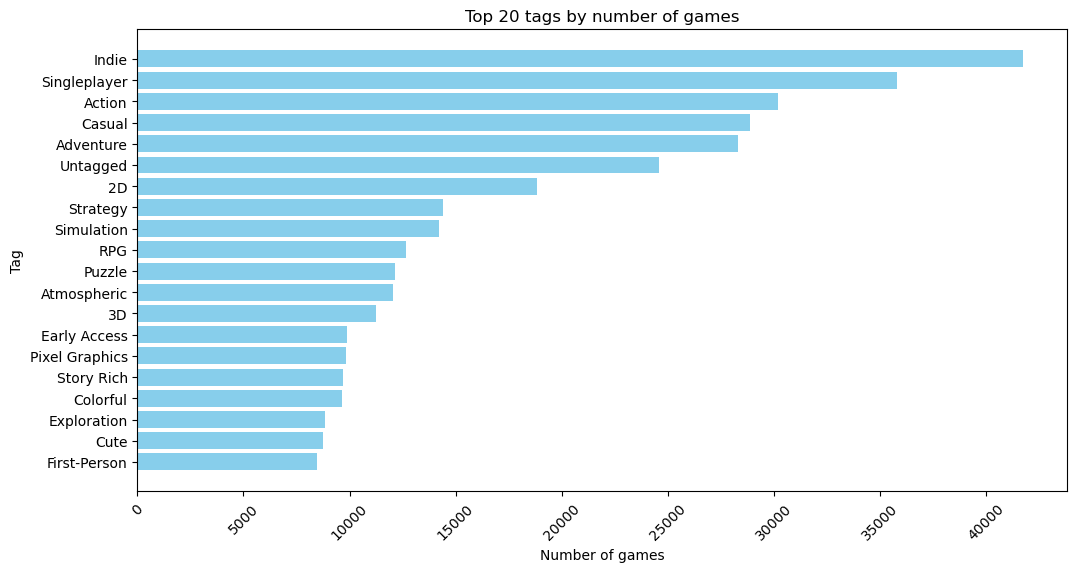

In [ ]:

all_tags = [tag.strip() for sublist in steam_df['Tags'].dropna() for tag in sublist.split(',') if sublist]
tag_counts = Counter(all_tags)
top_tags = pd.DataFrame(tag_counts.most_common(20), columns=['Tag', 'Number of Games'])
plt.figure(figsize=(12, 6))
plt.barh(top_tags['Tag'], top_tags['Number of Games'], color='skyblue')
plt.title('Top 20 tags by number of games')
plt.ylabel('Tag')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
selected_tags = ["Untagged", "2D", "Puzzle", "Atmospheric", "3D", "Early Access"]

In [ ]:
tag_counts = Counter(all_tags)
tag_counts.most_common(20)


[('Indie', 41755),
 ('Singleplayer', 35791),
 ('Action', 30177),
 ('Casual', 28878),
 ('Adventure', 28321),
 ('Untagged', 24591),
 ('2D', 18838),
 ('Strategy', 14392),
 ('Simulation', 14219),
 ('RPG', 12681),
 ('Puzzle', 12123),
 ('Atmospheric', 12046),
 ('3D', 11253),
 ('Early Access', 9889),
 ('Pixel Graphics', 9855),
 ('Story Rich', 9695),
 ('Colorful', 9632),
 ('Exploration', 8829),
 ('Cute', 8765),
 ('First-Person', 8448)]

In [ ]:

top_developers_deom = steam_df.groupby("Developers").agg({
    "DEOM":"sum",
    "Positive":"sum",
    "Negative":"sum"
}).reset_index().sort_values("DEOM",ascending = False).head(10)
top_developers_deom

,Developers,DEOM,Positive,Negative
8422,Choice of Games,1127.453666,6865,1106
9792,Creobit,1012.323727,39845,24635
14310,EroticGamesClub,1001.525929,0,0
25494,Laush Dmitriy Sergeevich,936.247319,2563,866
6355,Boogygames Studios,860.248609,603,304
23702,"KOEI TECMO GAMES CO., LTD.",819.540370,148003,50306
20347,Hosted Games,754.446882,3332,528
41521,Sokpop Collective,750.381879,3201,611
37424,Reforged Group,702.828618,251,359
13759,Elephant Games,645.466075,1136,529


In [ ]:
games_with_ratings = go.Figure(data=[
    go.Bar(name='Positive', x=top_developers_deom["Developers"], y=top_developers_deom["Positive"]),
    go.Bar(name='Negative', x=top_developers_deom["Developers"], y=top_developers_deom["Negative"])
])

games_with_ratings.update_layout(barmode='group',
    title_text='Developers that have top downloads with their positive and negative ratings',
    xaxis_title="Top developers",
    yaxis_title="Ratings")
games_with_ratings.show()

In [ ]:
top_publishers_deom = steam_df.groupby("Publishers").agg({
    "DEOM":"sum"
}).reset_index().sort_values("DEOM",ascending = False).head(10)
top_publishers_deom

,Publishers,DEOM
4700,Big Fish Games,3580.472308
624,8floor,1866.853953
34062,SEGA,1465.697630
37036,Square Enix,1459.028081
41381,Ubisoft,1315.009075
37562,Strategy First,1276.174157
16728,HH-Games,1258.966958
38542,THQ Nordic,1197.095197
35042,Sekai Project,1186.012511
11894,Electronic Arts,1167.346015


In [ ]:
top_publishers_deom_graph = px.bar(top_publishers_deom, y='DEOM', x='Publishers', title='Puplishers that have Top DEOM',
  labels={ "DEOM": "Total downloads",})
top_publishers_deom_graph.show()

In [ ]:
def encode_features(df, column_name, selected_values):
    for value in selected_values:
        new_col_name = f"{column_name}_{value.replace(' ', '_')}" 
        df[new_col_name] = df[column_name].apply(lambda x: 1 if value in x else 0)

In [ ]:
selected_publishers = ["Valve","Ubisoft", "Electronic Arts", "Bethesda Softworks","Xbox Game Studios"]
selected_developers = ["Valve", "Facepunch Studios","Ubisoft Montreal", "Amazon Games","Respawn Entertainment"]

In [ ]:
encode_features(steam_df, 'Developers', selected_developers)
encode_features(steam_df, 'Publishers', selected_publishers)

In [ ]:
encode_features(steam_df, 'Categories', selected_categories)
encode_features(steam_df, 'Genres', selected_genres)
encode_features(steam_df, 'Tags', selected_tags)

In [ ]:
steam_df = steam_df.drop(
    columns= ["Name", "Supported languages", "Categories", "Genres", "Tags","Developers","Genres", "Publishers", "Release date"])

In [ ]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91145 entries, 0 to 92749
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Peak CCU                            91145 non-null  int64  
 1   Required age                        91145 non-null  int64  
 2   Price                               91145 non-null  float64
 3   DLC count                           91145 non-null  int64  
 4   Windows                             91145 non-null  int64  
 5   Mac                                 91145 non-null  int64  
 6   Linux                               91145 non-null  int64  
 7   Metacritic score                    91145 non-null  int64  
 8   User score                          91145 non-null  int64  
 9   Positive                            91145 non-null  int64  
 10  Negative                            91145 non-null  int64  
 11  Achievements                        91145 non-

In [ ]:
steam_df.to_csv('steam_cleaned.csv')